In [1]:
import os
import time
import math
from datetime import datetime

import numpy as np
import pandas as pd
import scipy as sp
from tqdm import tqdm
from functools import partial

import tensorflow as tf
import tensorflow_probability as tfp

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

In [3]:
tf.test.is_gpu_available()

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


False

In [4]:
def variance_weighted_result(means, stddevs):
    """ Computes weighted mean and stddev of given means and
        stddevs arrays, using Inverse-variance weighting
    """
    assert np.size(means) == np.size(stddevs)
    assert means.shape == stddevs.shape
    variance = 1./np.sum(1./stddevs**2, axis=-1)
    mean = np.sum(means/(stddevs**2), axis=-1)
    mean *= variance
    return mean, np.sqrt(variance)

In [5]:
def compute_stats_tf(values):
    mean = tf.reduce_mean(values, axis=-1)
    var_unb = tf.reduce_sum((values - mean) ** 2, axis=-1) / (len(values) - 1)
    return mean, var_unb

In [6]:
NRUNS = 10

### F1 - simple gauss

In [36]:
import scipy.stats as spt

target = 1
target_precision = 1e-3

norm_dist = spt.norm(loc=0.5, scale=0.01)

prefix = 'f1'

target_dict = {
    'f1_d2': (norm_dist.cdf(1) - norm_dist.cdf(0)) ** 2,
    'f1_d4': (norm_dist.cdf(1) - norm_dist.cdf(0)) ** 4,
    'f1_d6': (norm_dist.cdf(1) - norm_dist.cdf(0)) ** 6,
    'f1_d8': (norm_dist.cdf(1) - norm_dist.cdf(0)) ** 8,
}
target_dict

{'f1_d2': 1.0, 'f1_d4': 1.0, 'f1_d6': 1.0, 'f1_d8': 1.0}

In [37]:
sigma = 0.01
alpha = sigma * math.sqrt(2)

alpha_tf = tf.constant(alpha, dtype=tf.float64)
pi_tf = tf.constant(math.pi, dtype=tf.float64)


def f1_tf_d2(x):
    pre = 1.0 / (alpha_tf * tf.sqrt(pi_tf)) ** 2
    exponent = -1 * tf.reduce_sum((x - .5) ** 2, axis=-1) / alpha_tf ** 2
    return pre * tf.exp(exponent)

def f1_tf_d4(x):
    pre = 1.0 / (alpha_tf * tf.sqrt(pi_tf)) ** 4
    exponent = -1 * tf.reduce_sum((x - .5) ** 2, axis=-1) / alpha_tf ** 2
    return pre * tf.exp(exponent)

def f1_tf_d6(x):
    pre = 1.0 / (alpha_tf * tf.sqrt(pi_tf)) ** 6
    exponent = -1 * tf.reduce_sum((x - .5) ** 2, axis=-1) / alpha_tf ** 2
    return pre * tf.exp(exponent)

def f1_tf_d8(x):
    pre = 1.0 / (alpha_tf * tf.sqrt(pi_tf)) ** 8
    exponent = -1 * tf.reduce_sum((x - .5) ** 2, axis=-1) / alpha_tf ** 2
    return pre * tf.exp(exponent)

In [38]:
dim2func_dict = {
    2: f1_tf_d2,
    4: f1_tf_d4,
    6: f1_tf_d6,
    8: f1_tf_d8,
}
dim2func_dict

{2: <function __main__.f1_tf_d2(x)>,
 4: <function __main__.f1_tf_d4(x)>,
 6: <function __main__.f1_tf_d6(x)>,
 8: <function __main__.f1_tf_d8(x)>}

#### Uniform

In [33]:
%%time
np.random.seed(123)
tf.random.set_seed(123)

result_means = []
result_sdevs = []
result_gen_times = []
result_eval_times = []
result_run_nums = []

ndims_lst = [2, 4, 6, 8]
neval_lst = list(map(int, [2**23]))
run_lst = list(range(1, NRUNS+1))

for run in run_lst:
    
    print(f'run={run}')
    for ndims in ndims_lst:
        
        integrand_tf = dim2func_dict[ndims]
        for neval in neval_lst:

            print(f'ndims={ndims}  neval={neval}')

            time_a = time.time()
            data = tf.random.uniform(shape=(neval, ndims), minval=0, maxval=1, dtype=tf.float64)
            gen_time = time.time() - time_a
            
            time_a = time.time()
            values = integrand_tf(data)
            mean, var_unb = compute_stats_tf(values)
            error = math.sqrt(var_unb.numpy() / neval)
            eval_time = time.time() - time_a
                        
            result_means.append(mean.numpy())
            result_sdevs.append(error)
            result_gen_times.append(gen_time)
            result_eval_times.append(eval_time)
            result_run_nums.append(run)

run=1
ndims=2  neval=8388608
ndims=4  neval=8388608
ndims=6  neval=8388608
ndims=8  neval=8388608
run=2
ndims=2  neval=8388608
ndims=4  neval=8388608
ndims=6  neval=8388608
ndims=8  neval=8388608
run=3
ndims=2  neval=8388608
ndims=4  neval=8388608
ndims=6  neval=8388608
ndims=8  neval=8388608
run=4
ndims=2  neval=8388608
ndims=4  neval=8388608
ndims=6  neval=8388608
ndims=8  neval=8388608
run=5
ndims=2  neval=8388608
ndims=4  neval=8388608
ndims=6  neval=8388608
ndims=8  neval=8388608
run=6
ndims=2  neval=8388608
ndims=4  neval=8388608
ndims=6  neval=8388608
ndims=8  neval=8388608
run=7
ndims=2  neval=8388608
ndims=4  neval=8388608
ndims=6  neval=8388608
ndims=8  neval=8388608
run=8
ndims=2  neval=8388608
ndims=4  neval=8388608
ndims=6  neval=8388608
ndims=8  neval=8388608
run=9
ndims=2  neval=8388608
ndims=4  neval=8388608
ndims=6  neval=8388608
ndims=8  neval=8388608
run=10
ndims=2  neval=8388608
ndims=4  neval=8388608
ndims=6  neval=8388608
ndims=8  neval=8388608
Wall time: 31.3 s


In [34]:
temp_df = pd.DataFrame({
    'ndims': sorted(ndims_lst * len(neval_lst)) * len(run_lst),
    'neval': sorted(neval_lst) * len(ndims_lst) * len(run_lst),
    'result_mean': result_means,
    'result_sdev': result_sdevs,
    'result_gen_time': result_gen_times,
    'result_eval_time': result_eval_times,
    'run_num': result_run_nums,
})
temp_df['total_time'] = temp_df.result_eval_time + temp_df.result_gen_time
temp_df['eval_time_perc'] = (temp_df.result_eval_time / (temp_df.result_gen_time + temp_df.result_eval_time)).round(2)

In [35]:
temp_df

,ndims,neval,result_mean,result_sdev,result_gen_time,result_eval_time,run_num,total_time,eval_time_perc
0,2,8388608,1.012203e+00,9.833377e-03,0.142619,0.282245,1,0.424864,0.66
1,4,8388608,9.857374e-01,2.857299e-01,0.248336,0.387963,1,0.636299,0.61
2,6,8388608,8.241898e-01,8.205304e-01,0.366021,0.520608,1,0.886629,0.59
3,8,8388608,6.444261e-31,6.442707e-31,0.484704,0.661232,1,1.145936,0.58
4,2,8388608,9.947551e-01,9.723519e-03,0.172539,0.284240,2,0.456779,0.62
5,4,8388608,7.783426e-01,2.099577e-01,0.267286,0.373003,2,0.640288,0.58
6,6,8388608,4.680154e-05,4.105441e-05,0.389957,0.512630,2,0.902587,0.57
7,8,8388608,1.507979e-18,1.507338e-18,0.478720,0.640288,2,1.119009,0.57
8,2,8388608,1.012901e+00,9.797358e-03,0.149600,0.303190,3,0.452790,0.67
9,4,8388608,8.842944e-01,1.994935e-01,0.242352,0.383973,3,0.626325,0.61


In [36]:
prefix

'f1'

In [37]:
os.makedirs('result/02_NaiveTensorflowLDSEager', exist_ok=True)
temp_df.to_csv(f'result/02_NaiveTensorflowLDSEager/{prefix}_uniform_new.csv', index=False)

In [38]:
# temp_df = pd.read_csv(f'result/02_NaiveTensorflowLDSEager/{prefix}_uniform_new.csv')

In [39]:
g_temp_df = temp_df.groupby(['ndims', 'neval'], as_index=False)
g_temp_df = g_temp_df[['result_mean',
                       'result_sdev',
                       'result_gen_time',
                       'result_eval_time',
                       'total_time',
                       'eval_time_perc']]

In [40]:
g_temp_df = g_temp_df.agg(np.mean)
g_temp_df

,ndims,neval,result_mean,result_sdev,result_gen_time,result_eval_time,total_time,eval_time_perc
0,2,8388608,9.986094e-01,9.738650e-03,0.162166,0.285536,0.447703,0.638
1,4,8388608,1.064130e+00,2.836652e-01,0.247040,0.399033,0.646073,0.616
2,6,8388608,4.167528e-01,4.146017e-01,0.370609,0.524398,0.895007,0.587
3,8,8388608,5.638065e-17,5.069735e-17,0.492882,0.652057,1.144939,0.570


In [41]:
os.makedirs('result/02_NaiveTensorflowLDSEager', exist_ok=True)
g_temp_df.to_csv(f'result/02_NaiveTensorflowLDSEager/{prefix}_uniform_agg_new.csv', index=False)

In [42]:
# temp_df.groupby(['ndims', 'neval'], as_index=False).agg([np.mean, np.std])

#### Halton

In [43]:
# def get_halton_samples(batch_size, n_batch, ndims):
#     a = []
#     for i in tqdm(range(n_batch)):
#         sequence_indices = tf.range(start=batch_size*i, limit=batch_size*(i+1), dtype=tf.int32)
#         a.append(tfp.mcmc.sample_halton_sequence(
#                     dim=ndims,
#                     sequence_indices=sequence_indices,
#                     dtype=tf.float64,
#                     randomized=True,
#                 ))
#     return tf.concat(a, axis=0)

In [44]:
%%time
np.random.seed(123)
tf.random.set_seed(123)

result_means = []
result_sdevs = []
result_gen_times = []
result_eval_times = []
result_run_nums = []

ndims_lst = [2, 4, 6, 8]
neval_lst = list(map(int, [2**23]))
run_lst = list(range(1, 1+1))

for run in run_lst:
    
    print(f'run={run}')
    for ndims in ndims_lst:
        
        integrand_tf = dim2func_dict[ndims]
        for neval in neval_lst:

            print(f'ndims={ndims}  neval={neval}')

            time_a = time.time()
            #data = get_halton_samples(batch_size=neval//10, n_batch=10, ndims=ndims)
            data = tfp.mcmc.sample_halton_sequence(
               dim=ndims,
               num_results=neval,
               sequence_indices=None,
               dtype=tf.float64,
               randomized=False,
            )
            gen_time = time.time() - time_a
                        
            time_a = time.time()
            values = integrand_tf(data)
            mean, var_unb = compute_stats_tf(values)
            error = math.sqrt(var_unb.numpy() / neval)
            eval_time = time.time() - time_a
                        
            result_means.append(mean.numpy())
            result_sdevs.append(error)
            result_gen_times.append(gen_time)
            result_eval_times.append(eval_time)
            result_run_nums.append(run)
            
            # print(current_result_mean, current_result_stddev)

run=1
ndims=2  neval=8388608
ndims=4  neval=8388608
ndims=6  neval=8388608
ndims=8  neval=8388608
Wall time: 3min 47s


In [45]:
temp_df = pd.DataFrame({
    'ndims': sorted(ndims_lst * len(neval_lst)) * len(run_lst),
    'neval': sorted(neval_lst) * len(ndims_lst) * len(run_lst),
    'result_mean': result_means,
    'result_sdev': result_sdevs,
    'result_gen_time': result_gen_times,
    'result_eval_time': result_eval_times,
    'run_num': result_run_nums,
})
temp_df['total_time'] = temp_df.result_eval_time + temp_df.result_gen_time
temp_df['eval_time_perc'] = (temp_df.result_eval_time / (temp_df.result_gen_time + temp_df.result_eval_time)).round(2)

In [46]:
temp_df

,ndims,neval,result_mean,result_sdev,result_gen_time,result_eval_time,run_num,total_time,eval_time_perc
0,2,8388608,1.000031e+00,9.734029e-03,4.781217,0.258310,1,5.039526,0.05
1,4,8388608,1.003765e+00,2.884162e-01,19.431049,0.427855,1,19.858904,0.02
2,6,8388608,9.327430e-01,9.313568e-01,67.747867,0.712096,1,68.459963,0.01
3,8,8388608,1.332454e-14,1.332454e-14,132.063910,1.633633,1,133.697542,0.01


In [47]:
os.makedirs('result/02_NaiveTensorflowLDSEager', exist_ok=True)
temp_df.to_csv(f'result/02_NaiveTensorflowLDSEager/{prefix}_halton_new.csv', index=False)

In [48]:
# temp_df = pd.read_csv(f'result/02_NaiveTensorflowLDSEager/{prefix}_halton_new.csv')

In [49]:
g_temp_df = temp_df.groupby(['ndims', 'neval'], as_index=False)
g_temp_df = g_temp_df[['result_mean',
                       'result_sdev',
                       'result_gen_time',
                       'result_eval_time',
                       'total_time',
                       'eval_time_perc']]

In [50]:
g_temp_df = g_temp_df.agg(np.mean)
g_temp_df

,ndims,neval,result_mean,result_sdev,result_gen_time,result_eval_time,total_time,eval_time_perc
0,2,8388608,1.000031e+00,9.734029e-03,4.781217,0.258310,5.039526,0.05
1,4,8388608,1.003765e+00,2.884162e-01,19.431049,0.427855,19.858904,0.02
2,6,8388608,9.327430e-01,9.313568e-01,67.747867,0.712096,68.459963,0.01
3,8,8388608,1.332454e-14,1.332454e-14,132.063910,1.633633,133.697542,0.01


In [51]:
os.makedirs('result/02_NaiveTensorflowLDSEager', exist_ok=True)
g_temp_df.to_csv(f'result/02_NaiveTensorflowLDSEager/{prefix}_halton_agg_new.csv', index=False)

#### Sobol

In [156]:
integrand_tf(tf.constant([[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,]], dtype=tf.float64))

<tf.Tensor: shape=(1,), dtype=float64, numpy=array([6.41623891e+12])>

In [159]:
tf.reduce_max(integrand_tf(data))

<tf.Tensor: shape=(), dtype=float64, numpy=6416238909177.708>

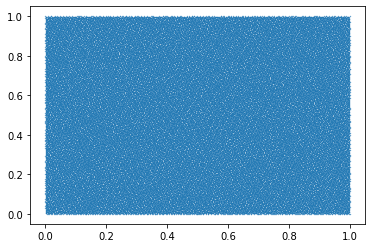

In [155]:
a = 100000
plt.scatter(data[:a, 0], data[:a, 1], s=0.1)

In [39]:
%%time
np.random.seed(123)
tf.random.set_seed(123)

result_means = []
result_sdevs = []
result_gen_times = []
result_eval_times = []
result_run_nums = []

ndims_lst = [2, 4, 6, 8]
neval_lst = list(map(int, [2**23]))
run_lst = list(range(1, NRUNS+1))

for run in run_lst:
    
    print(f'run={run}')
    for ndims in ndims_lst:
        
        integrand_tf = dim2func_dict[ndims]
        for neval in neval_lst:

            print(f'ndims={ndims}  neval={neval}')

            time_a = time.time()
            data = tf.math.sobol_sample(
                dim=ndims,
                num_results=neval,
                # skip=j*nitn,
                dtype=tf.dtypes.float64,
            )
            gen_time = time.time() - time_a
            
            time_a = time.time()
            values = integrand_tf(data)
            mean, var_unb = compute_stats_tf(values)
            error = math.sqrt(var_unb.numpy() / neval)
            eval_time = time.time() - time_a
                        
            result_means.append(mean.numpy())
            result_sdevs.append(error)
            result_gen_times.append(gen_time)
            result_eval_times.append(eval_time)
            result_run_nums.append(run)
            
            # print(current_result_mean, current_result_stddev)

run=1
ndims=2  neval=8388608
ndims=4  neval=8388608
ndims=6  neval=8388608
ndims=8  neval=8388608
run=2
ndims=2  neval=8388608
ndims=4  neval=8388608
ndims=6  neval=8388608
ndims=8  neval=8388608
run=3
ndims=2  neval=8388608
ndims=4  neval=8388608
ndims=6  neval=8388608
ndims=8  neval=8388608
run=4
ndims=2  neval=8388608
ndims=4  neval=8388608
ndims=6  neval=8388608
ndims=8  neval=8388608
run=5
ndims=2  neval=8388608
ndims=4  neval=8388608
ndims=6  neval=8388608
ndims=8  neval=8388608
run=6
ndims=2  neval=8388608
ndims=4  neval=8388608
ndims=6  neval=8388608
ndims=8  neval=8388608
run=7
ndims=2  neval=8388608
ndims=4  neval=8388608
ndims=6  neval=8388608
ndims=8  neval=8388608
run=8
ndims=2  neval=8388608
ndims=4  neval=8388608
ndims=6  neval=8388608
ndims=8  neval=8388608
run=9
ndims=2  neval=8388608
ndims=4  neval=8388608
ndims=6  neval=8388608
ndims=8  neval=8388608
run=10
ndims=2  neval=8388608
ndims=4  neval=8388608
ndims=6  neval=8388608
ndims=8  neval=8388608
Wall time: 20.5 s


In [40]:
temp_df = pd.DataFrame({
    'ndims': sorted(ndims_lst * len(neval_lst)) * len(run_lst),
    'neval': sorted(neval_lst) * len(ndims_lst) * len(run_lst),
    'result_mean': result_means,
    'result_sdev': result_sdevs,
    'result_gen_time': result_gen_times,
    'result_eval_time': result_eval_times,
    'run_num': result_run_nums,
})
temp_df['total_time'] = temp_df.result_eval_time + temp_df.result_gen_time
temp_df['eval_time_perc'] = (temp_df.result_eval_time / (temp_df.result_gen_time + temp_df.result_eval_time)).round(2)

In [41]:
temp_df

,ndims,neval,result_mean,result_sdev,result_gen_time,result_eval_time,run_num,total_time,eval_time_perc
0,2,8388608,1.000000,0.009734,0.058844,0.268281,1,0.327125,0.82
1,4,8388608,1.529660,0.453533,0.035904,0.399930,1,0.435834,0.92
2,6,8388608,480.599212,480.585314,0.052859,0.506645,1,0.559504,0.91
3,8,8388608,764875.281951,764875.281951,0.087765,0.657242,1,0.745008,0.88
4,2,8388608,1.000000,0.009734,0.048869,0.258309,2,0.307178,0.84
5,4,8388608,1.529660,0.453533,0.035904,0.414890,2,0.450794,0.92
6,6,8388608,480.599212,480.585314,0.064827,0.510634,2,0.575461,0.89
7,8,8388608,764875.281951,764875.281951,0.081781,0.670208,2,0.751989,0.89
8,2,8388608,1.000000,0.009734,0.051861,0.269280,3,0.321141,0.84
9,4,8388608,1.529660,0.453533,0.033910,0.381978,3,0.415888,0.92


In [42]:
os.makedirs('result/02_NaiveTensorflowLDSEager', exist_ok=True)
temp_df.to_csv(f'result/02_NaiveTensorflowLDSEager/{prefix}_sobol_new.csv', index=False)

In [43]:
# temp_df = pd.read_csv(f'result/02_NaiveTensorflowLDSEager/{prefix}_sobol_new.csv')

In [44]:
g_temp_df = temp_df.groupby(['ndims', 'neval'], as_index=False)
g_temp_df = g_temp_df[['result_mean',
                       'result_sdev',
                       'result_gen_time',
                       'result_eval_time',
                       'total_time',
                       'eval_time_perc']]

In [45]:
g_temp_df = g_temp_df.agg(np.mean)
g_temp_df

,ndims,neval,result_mean,result_sdev,result_gen_time,result_eval_time,total_time,eval_time_perc
0,2,8388608,1.000000,0.009734,0.052859,0.268482,0.321341,0.835
1,4,8388608,1.529660,0.453533,0.036103,0.389359,0.425462,0.915
2,6,8388608,480.599212,480.585314,0.061336,0.512430,0.573766,0.893
3,8,8388608,764875.281951,764875.281951,0.080884,0.645374,0.726258,0.889


In [46]:
os.makedirs('result/02_NaiveTensorflowLDSEager', exist_ok=True)
g_temp_df.to_csv(f'result/02_NaiveTensorflowLDSEager/{prefix}_sobol_agg_new.csv', index=False)

### F2 - triple gauss

In [24]:
import scipy.stats as spt

norm_m1, norm_m2, norm_m3 = 0.33, 0.47, 0.67

norm_dist_1 = spt.norm(loc=norm_m1, scale=0.01)
norm_dist_2 = spt.norm(loc=norm_m2, scale=0.01)
norm_dist_3 = spt.norm(loc=norm_m3, scale=0.01)
# norm_dist = (norm_dist_1 + norm_dist_2 + norm_dist_3) / 3

norm_triple = norm_dist_1.cdf(1) - norm_dist_1.cdf(0) \
            + norm_dist_2.cdf(1) - norm_dist_2.cdf(0) \
            + norm_dist_3.cdf(1) - norm_dist_3.cdf(0)
norm_triple /= 3

prefix = 'f2'

target_dict = {
    'f2_d2': norm_triple ** 2,
    'f2_d4': norm_triple ** 4,
    'f2_d6': norm_triple ** 6,
    'f2_d8': norm_triple ** 8,
}
target_dict

{'f2_d2': 1.0, 'f2_d4': 1.0, 'f2_d6': 1.0, 'f2_d8': 1.0}

In [25]:
sigma = 0.01
alpha = sigma * math.sqrt(2)

alpha_tf = tf.constant(alpha, dtype=tf.float64)
pi_tf = tf.constant(math.pi, dtype=tf.float64)


# @tf.function(input_signature=[tf.TensorSpec(shape=(None,2), dtype=tf.float64)])
def f2_tf_d2(x):
    pre = tf.cast(1. / (alpha_tf * tf.sqrt(pi_tf)) ** 2, dtype=tf.float64)
    exponent1 = -1. * tf.reduce_sum(((x - norm_m1) ** 2), axis=-1) / alpha_tf ** 2
    exponent2 = -1. * tf.reduce_sum(((x - norm_m2) ** 2), axis=-1) / alpha_tf ** 2
    exponent3 = -1. * tf.reduce_sum(((x - norm_m3) ** 2), axis=-1) / alpha_tf ** 2
    return pre / 3 * (tf.exp(exponent1) + tf.exp(exponent2) + tf.exp(exponent3))


def f2_np_d2(x):
    pre = 1. / (alpha_tf * math.sqrt(math.pi)) ** 2
    exponent1 = -1. * np.sum(((x - norm_m1) ** 2), axis=-1) / alpha_tf ** 2
    exponent2 = -1. * np.sum(((x - norm_m2) ** 2), axis=-1) / alpha_tf ** 2
    exponent3 = -1. * np.sum(((x - norm_m3) ** 2), axis=-1) / alpha_tf ** 2
    return pre / 3 * (np.exp(exponent1) + np.exp(exponent2) + np.exp(exponent3))


# @tf.function(input_signature=[tf.TensorSpec(shape=(None,4), dtype=tf.float64)])
def f2_tf_d4(x):
    pre = tf.cast(1. / (alpha_tf * tf.sqrt(pi_tf)) ** 4, dtype=tf.float64)
    exponent1 = -1. * tf.reduce_sum(((x - norm_m1) ** 2), axis=-1) / alpha_tf ** 2
    exponent2 = -1. * tf.reduce_sum(((x - norm_m2) ** 2), axis=-1) / alpha_tf ** 2
    exponent3 = -1. * tf.reduce_sum(((x - norm_m3) ** 2), axis=-1) / alpha_tf ** 2
    return pre / 3 * (tf.exp(exponent1) + tf.exp(exponent2) + tf.exp(exponent3))


# @tf.function(input_signature=[tf.TensorSpec(shape=(None,6), dtype=tf.float64)])
def f2_tf_d6(x):
    pre = tf.cast(1. / (alpha_tf * tf.sqrt(pi_tf)) ** 6, dtype=tf.float64)
    exponent1 = -1. * tf.reduce_sum(((x - norm_m1) ** 2), axis=-1) / alpha_tf ** 2
    exponent2 = -1. * tf.reduce_sum(((x - norm_m2) ** 2), axis=-1) / alpha_tf ** 2
    exponent3 = -1. * tf.reduce_sum(((x - norm_m3) ** 2), axis=-1) / alpha_tf ** 2
    return pre / 3 * (tf.exp(exponent1) + tf.exp(exponent2) + tf.exp(exponent3))


# @tf.function(input_signature=[tf.TensorSpec(shape=(None,8), dtype=tf.float64)])
def f2_tf_d8(x):
    pre = tf.cast(1. / (alpha_tf * tf.sqrt(pi_tf)) ** 8, dtype=tf.float64)
    exponent1 = -1. * tf.reduce_sum(((x - norm_m1) ** 2), axis=-1) / alpha_tf ** 2
    exponent2 = -1. * tf.reduce_sum(((x - norm_m2) ** 2), axis=-1) / alpha_tf ** 2
    exponent3 = -1. * tf.reduce_sum(((x - norm_m3) ** 2), axis=-1) / alpha_tf ** 2
    return pre / 3 * (tf.exp(exponent1) + tf.exp(exponent2) + tf.exp(exponent3))

In [26]:
dim2func_dict = {
    2: f2_tf_d2,
    4: f2_tf_d4,
    6: f2_tf_d6,
    8: f2_tf_d8,
}
dim2func_dict

{2: <function __main__.f2_tf_d2(x)>,
 4: <function __main__.f2_tf_d4(x)>,
 6: <function __main__.f2_tf_d6(x)>,
 8: <function __main__.f2_tf_d8(x)>}

#### Uniform

In [64]:
%%time
np.random.seed(123)
tf.random.set_seed(123)

result_means = []
result_sdevs = []
result_gen_times = []
result_eval_times = []
result_run_nums = []

ndims_lst = [2, 4, 6, 8]
neval_lst = list(map(int, [2**23]))
run_lst = list(range(1, NRUNS+1))

for run in run_lst:
    
    print(f'run={run}')
    for ndims in ndims_lst:
        
        integrand_tf = dim2func_dict[ndims]
        for neval in neval_lst:

            print(f'ndims={ndims}  neval={neval}')

            time_a = time.time()
            data = tf.random.uniform(shape=(neval, ndims), minval=0, maxval=1, dtype=tf.float64)
            gen_time = time.time() - time_a
            
            time_a = time.time()
            values = integrand_tf(data)
            mean, var_unb = compute_stats_tf(values)
            error = math.sqrt(var_unb.numpy() / neval)
            eval_time = time.time() - time_a
                        
            result_means.append(mean.numpy())
            result_sdevs.append(error)
            result_gen_times.append(gen_time)
            result_eval_times.append(eval_time)
            result_run_nums.append(run)

run=1
ndims=2  neval=8388608
ndims=4  neval=8388608
ndims=6  neval=8388608
ndims=8  neval=8388608
run=2
ndims=2  neval=8388608
ndims=4  neval=8388608
ndims=6  neval=8388608
ndims=8  neval=8388608
run=3
ndims=2  neval=8388608
ndims=4  neval=8388608
ndims=6  neval=8388608
ndims=8  neval=8388608
run=4
ndims=2  neval=8388608
ndims=4  neval=8388608
ndims=6  neval=8388608
ndims=8  neval=8388608
run=5
ndims=2  neval=8388608
ndims=4  neval=8388608
ndims=6  neval=8388608
ndims=8  neval=8388608
run=6
ndims=2  neval=8388608
ndims=4  neval=8388608
ndims=6  neval=8388608
ndims=8  neval=8388608
run=7
ndims=2  neval=8388608
ndims=4  neval=8388608
ndims=6  neval=8388608
ndims=8  neval=8388608
run=8
ndims=2  neval=8388608
ndims=4  neval=8388608
ndims=6  neval=8388608
ndims=8  neval=8388608
run=9
ndims=2  neval=8388608
ndims=4  neval=8388608
ndims=6  neval=8388608
ndims=8  neval=8388608
run=10
ndims=2  neval=8388608
ndims=4  neval=8388608
ndims=6  neval=8388608
ndims=8  neval=8388608
Wall time: 1min 3s


In [65]:
temp_df = pd.DataFrame({
    'ndims': sorted(ndims_lst * len(neval_lst)) * len(run_lst),
    'neval': sorted(neval_lst) * len(ndims_lst) * len(run_lst),
    'result_mean': result_means,
    'result_sdev': result_sdevs,
    'result_gen_time': result_gen_times,
    'result_eval_time': result_eval_times,
    'run_num': result_run_nums,
})
temp_df['total_time'] = temp_df.result_eval_time + temp_df.result_gen_time
temp_df['eval_time_perc'] = (temp_df.result_eval_time / (temp_df.result_gen_time + temp_df.result_eval_time)).round(2)

In [66]:
temp_df

,ndims,neval,result_mean,result_sdev,result_gen_time,result_eval_time,run_num,total_time,eval_time_perc
0,2,8388608,1.000680e+00,5.624463e-03,0.250331,0.698133,1,0.948464,0.74
1,4,8388608,7.884471e-01,1.341578e-01,0.238363,1.096069,1,1.334432,0.82
2,6,8388608,1.312691e-03,7.284974e-04,0.371008,1.495003,1,1.866011,0.80
3,8,8388608,2.124860e-12,2.123453e-12,0.481712,1.848059,1,2.329771,0.79
4,2,8388608,1.009146e+00,5.654809e-03,0.154587,0.710102,2,0.864688,0.82
5,4,8388608,1.142606e+00,1.981008e-01,0.260304,1.075126,2,1.335429,0.81
6,6,8388608,4.205852e-04,2.602017e-04,0.359040,1.444139,2,1.803179,0.80
7,8,8388608,1.507329e-12,1.507286e-12,0.543547,1.843073,2,2.386619,0.77
8,2,8388608,1.001388e+00,5.629083e-03,0.186501,0.691152,3,0.877653,0.79
9,4,8388608,9.458713e-01,1.710082e-01,0.263296,1.081110,3,1.344406,0.80


In [67]:
os.makedirs('result/02_NaiveTensorflowLDSEager', exist_ok=True)
temp_df.to_csv(f'result/02_NaiveTensorflowLDSEager/{prefix}_uniform_new.csv', index=False)

In [68]:
# temp_df = pd.read_csv(f'result/02_NaiveTensorflowLDSEager/{prefix}_uniform_new.csv')

In [69]:
g_temp_df = temp_df.groupby(['ndims', 'neval'], as_index=False)
g_temp_df = g_temp_df[['result_mean',
                       'result_sdev',
                       'result_gen_time',
                       'result_eval_time',
                       'total_time',
                       'eval_time_perc']]

In [70]:
g_temp_df = g_temp_df.agg(np.mean)
g_temp_df

,ndims,neval,result_mean,result_sdev,result_gen_time,result_eval_time,total_time,eval_time_perc
0,2,8388608,1.000789e+00,5.621031e-03,0.170445,0.698632,0.869076,0.805
1,4,8388608,1.015050e+00,1.615963e-01,0.251627,1.097865,1.349492,0.813
2,6,8388608,9.966206e-02,9.130449e-02,0.367617,1.454511,1.822128,0.797
3,8,8388608,2.558237e-10,1.875957e-10,0.498966,1.847560,2.346526,0.786


In [71]:
os.makedirs('result/02_NaiveTensorflowLDSEager', exist_ok=True)
g_temp_df.to_csv(f'result/02_NaiveTensorflowLDSEager/{prefix}_uniform_agg_new.csv', index=False)

#### Halton

In [48]:
# def get_halton_samples(batch_size, n_batch, ndims):
#     a = []
#     for i in tqdm(range(n_batch)):
#         sequence_indices = tf.range(start=batch_size*i, limit=batch_size*(i+1), dtype=tf.int32)
#         a.append(tfp.mcmc.sample_halton_sequence(
#                     dim=ndims,
#                     sequence_indices=sequence_indices,
#                     dtype=tf.float64,
#                     randomized=True,
#                 ))
#     return tf.concat(a, axis=0)

In [72]:
%%time
np.random.seed(123)
tf.random.set_seed(123)

result_means = []
result_sdevs = []
result_gen_times = []
result_eval_times = []
result_run_nums = []

ndims_lst = [2, 4, 6, 8]
neval_lst = list(map(int, [2**23]))
run_lst = list(range(1, 1+1))

for run in run_lst:
    
    print(f'run={run}')
    for ndims in ndims_lst:
        
        integrand_tf = dim2func_dict[ndims]
        for neval in neval_lst:

            print(f'ndims={ndims}  neval={neval}')

            time_a = time.time()
            #data = get_halton_samples(batch_size=neval//10, n_batch=10, ndims=ndims)
            data = tfp.mcmc.sample_halton_sequence(
               dim=ndims,
               num_results=neval,
               sequence_indices=None,
               dtype=tf.float64,
               randomized=False,
            )
            gen_time = time.time() - time_a
                        
            time_a = time.time()
            values = integrand_tf(data)
            mean, var_unb = compute_stats_tf(values)
            error = math.sqrt(var_unb.numpy() / neval)
            eval_time = time.time() - time_a
                        
            result_means.append(mean.numpy())
            result_sdevs.append(error)
            result_gen_times.append(gen_time)
            result_eval_times.append(eval_time)
            result_run_nums.append(run)

run=1
ndims=2  neval=8388608
ndims=4  neval=8388608
ndims=6  neval=8388608
ndims=8  neval=8388608
Wall time: 3min 21s


In [73]:
temp_df = pd.DataFrame({
    'ndims': sorted(ndims_lst * len(neval_lst)) * len(run_lst),
    'neval': sorted(neval_lst) * len(ndims_lst) * len(run_lst),
    'result_mean': result_means,
    'result_sdev': result_sdevs,
    'result_gen_time': result_gen_times,
    'result_eval_time': result_eval_times,
    'run_num': result_run_nums,
})
temp_df['total_time'] = temp_df.result_eval_time + temp_df.result_gen_time
temp_df['eval_time_perc'] = (temp_df.result_eval_time / (temp_df.result_gen_time + temp_df.result_eval_time)).round(2)

In [74]:
temp_df

,ndims,neval,result_mean,result_sdev,result_gen_time,result_eval_time,run_num,total_time,eval_time_perc
0,2,8388608,9.999792e-01,5.612545e-03,5.164193,0.682176,1,5.846369,0.12
1,4,8388608,1.020870e+00,1.610644e-01,10.129917,1.122000,1,11.251917,0.10
2,6,8388608,6.531601e-02,6.484205e-02,53.990649,1.826118,1,55.816766,0.03
3,8,8388608,5.894760e-19,4.767052e-19,125.836559,2.154240,1,127.990799,0.02


In [75]:
prefix

'f2'

In [76]:
os.makedirs('result/02_NaiveTensorflowLDSEager', exist_ok=True)
temp_df.to_csv(f'result/02_NaiveTensorflowLDSEager/{prefix}_halton_new.csv', index=False)

In [77]:
# temp_df = pd.read_csv(f'result/02_NaiveTensorflowLDSEager/{prefix}_halton.csv')

In [78]:
g_temp_df = temp_df.groupby(['ndims', 'neval'], as_index=False)
g_temp_df = g_temp_df[['result_mean',
                       'result_sdev',
                       'result_gen_time',
                       'result_eval_time',
                       'total_time',
                       'eval_time_perc']]

In [79]:
g_temp_df = g_temp_df.agg(np.mean)
g_temp_df

,ndims,neval,result_mean,result_sdev,result_gen_time,result_eval_time,total_time,eval_time_perc
0,2,8388608,9.999792e-01,5.612545e-03,5.164193,0.682176,5.846369,0.12
1,4,8388608,1.020870e+00,1.610644e-01,10.129917,1.122000,11.251917,0.10
2,6,8388608,6.531601e-02,6.484205e-02,53.990649,1.826118,55.816766,0.03
3,8,8388608,5.894760e-19,4.767052e-19,125.836559,2.154240,127.990799,0.02


In [80]:
os.makedirs('result/02_NaiveTensorflowLDSEager', exist_ok=True)
g_temp_df.to_csv(f'result/02_NaiveTensorflowLDSEager/{prefix}_halton_agg_new.csv', index=False)

#### Sobol

In [27]:
%%time
np.random.seed(123)
tf.random.set_seed(123)

result_means = []
result_sdevs = []
result_gen_times = []
result_eval_times = []
result_run_nums = []

ndims_lst = [2, 4, 6, 8]
neval_lst = list(map(int, [2**23]))
run_lst = list(range(1, NRUNS+1))

for run in run_lst:
    
    print(f'run={run}')
    for ndims in ndims_lst:
        
        integrand_tf = dim2func_dict[ndims]
        for neval in neval_lst:

            print(f'ndims={ndims}  neval={neval}')

            time_a = time.time()
            data = tf.math.sobol_sample(
                dim=ndims,
                num_results=neval,
                # skip=j*nitn,
                dtype=tf.dtypes.float64,
            )
            gen_time = time.time() - time_a
            
            time_a = time.time()
            values = integrand_tf(data)
            mean, var_unb = compute_stats_tf(values)
            error = math.sqrt(var_unb.numpy() / neval)
            eval_time = time.time() - time_a
                        
            result_means.append(mean.numpy())
            result_sdevs.append(error)
            result_gen_times.append(gen_time)
            result_eval_times.append(eval_time)
            result_run_nums.append(run)

run=1
ndims=2  neval=8388608
ndims=4  neval=8388608
ndims=6  neval=8388608
ndims=8  neval=8388608
run=2
ndims=2  neval=8388608
ndims=4  neval=8388608
ndims=6  neval=8388608
ndims=8  neval=8388608
run=3
ndims=2  neval=8388608
ndims=4  neval=8388608
ndims=6  neval=8388608
ndims=8  neval=8388608
run=4
ndims=2  neval=8388608
ndims=4  neval=8388608
ndims=6  neval=8388608
ndims=8  neval=8388608
run=5
ndims=2  neval=8388608
ndims=4  neval=8388608
ndims=6  neval=8388608
ndims=8  neval=8388608
run=6
ndims=2  neval=8388608
ndims=4  neval=8388608
ndims=6  neval=8388608
ndims=8  neval=8388608
run=7
ndims=2  neval=8388608
ndims=4  neval=8388608
ndims=6  neval=8388608
ndims=8  neval=8388608
run=8
ndims=2  neval=8388608
ndims=4  neval=8388608
ndims=6  neval=8388608
ndims=8  neval=8388608
run=9
ndims=2  neval=8388608
ndims=4  neval=8388608
ndims=6  neval=8388608
ndims=8  neval=8388608
run=10
ndims=2  neval=8388608
ndims=4  neval=8388608
ndims=6  neval=8388608
ndims=8  neval=8388608
Wall time: 51.8 s


In [28]:
temp_df = pd.DataFrame({
    'ndims': sorted(ndims_lst * len(neval_lst)) * len(run_lst),
    'neval': sorted(neval_lst) * len(ndims_lst) * len(run_lst),
    'result_mean': result_means,
    'result_sdev': result_sdevs,
    'result_gen_time': result_gen_times,
    'result_eval_time': result_eval_times,
    'run_num': result_run_nums,
})
temp_df['total_time'] = temp_df.result_eval_time + temp_df.result_gen_time
temp_df['eval_time_perc'] = (temp_df.result_eval_time / (temp_df.result_gen_time + temp_df.result_eval_time)).round(2)

In [29]:
temp_df

,ndims,neval,result_mean,result_sdev,result_gen_time,result_eval_time,run_num,total_time,eval_time_perc
0,2,8388608,1.000000e+00,5.612668e-03,0.071808,0.727560,1,0.799368,0.91
1,4,8388608,1.011052e+00,1.438044e-01,0.033909,1.057324,1,1.091233,0.97
2,6,8388608,1.744510e-02,1.224564e-02,0.053856,1.431369,1,1.485224,0.96
3,8,8388608,5.913819e-11,5.913819e-11,0.083776,1.782949,1,1.866725,0.96
4,2,8388608,1.000000e+00,5.612668e-03,0.051861,0.684675,2,0.736536,0.93
5,4,8388608,1.011052e+00,1.438044e-01,0.037899,1.059681,2,1.097580,0.97
6,6,8388608,1.744510e-02,1.224564e-02,0.055851,1.400895,2,1.456746,0.96
7,8,8388608,5.913819e-11,5.913819e-11,0.081782,1.793909,2,1.875691,0.96
8,2,8388608,1.000000e+00,5.612668e-03,0.051862,0.661736,3,0.713598,0.93
9,4,8388608,1.011052e+00,1.438044e-01,0.043882,1.024293,3,1.068176,0.96


In [30]:
prefix

'f2'

In [31]:
os.makedirs('result/02_NaiveTensorflowLDSEager', exist_ok=True)
temp_df.to_csv(f'result/02_NaiveTensorflowLDSEager/{prefix}_sobol_new.csv', index=False)

In [32]:
# temp_df = pd.read_csv(f'result/02_NaiveTensorflowLDSEager/{prefix}_sobol_new.csv')

In [33]:
g_temp_df = temp_df.groupby(['ndims', 'neval'], as_index=False)
g_temp_df = g_temp_df[['result_mean',
                       'result_sdev',
                       'result_gen_time',
                       'result_eval_time',
                       'total_time',
                       'eval_time_perc']]

In [34]:
g_temp_df = g_temp_df.agg(np.mean)
g_temp_df

,ndims,neval,result_mean,result_sdev,result_gen_time,result_eval_time,total_time,eval_time_perc
0,2,8388608,1.000000e+00,5.612668e-03,0.055554,0.680506,0.736060,0.925
1,4,8388608,1.011052e+00,1.438044e-01,0.038349,1.050507,1.088856,0.966
2,6,8388608,1.744510e-02,1.224564e-02,0.058499,1.413444,1.471943,0.960
3,8,8388608,5.913819e-11,5.913819e-11,0.084631,1.795996,1.880627,0.957


In [35]:
os.makedirs('result/02_NaiveTensorflowLDSEager', exist_ok=True)
g_temp_df.to_csv(f'result/02_NaiveTensorflowLDSEager/{prefix}_sobol_agg_new.csv', index=False)

### F3 - sin

In [7]:
prefix = 'f3'

target_dict = {
    # from 0 to 10
    'f3_d2': 8 * np.cos(5) * np.sin(5) ** 3,    
    'f3_d4': 32 * (np.cos(5) + np.cos(15)) * np.sin(5) ** 5,
    'f3_d6': 128 * (np.cos(5) + np.cos(15) + np.cos(25)) * np.sin(5) ** 7,
    'f3_d8': 128 * (np.cos(35) - np.cos(45)) * np.sin(5) ** 7,
}
target_dict

{'f3_d2': -2.000987472506367,
 'f3_d4': 12.350995604774042,
 'f3_d6': -49.165073816419444,
 'f3_d8': 136.37560840041465}

In [8]:
# @tf.function(input_signature=[tf.TensorSpec(shape=(None,2), dtype=tf.float64)])
def f3_tf_d2(x):
    return tf.sin(tf.reduce_sum(x, axis=-1)) / target_dict['f3_d2']

def f3_np_d2(x):
    return np.sin(np.sum(x, axis=-1))


# @tf.function(input_signature=[tf.TensorSpec(shape=(None,4), dtype=tf.float64)])
def f3_tf_d4(x):
    return tf.sin(tf.reduce_sum(x, axis=-1)) / target_dict['f3_d4']


# @tf.function(input_signature=[tf.TensorSpec(shape=(None,6), dtype=tf.float64)])
def f3_tf_d6(x):
    return tf.sin(tf.reduce_sum(x, axis=-1)) / target_dict['f3_d6']


# @tf.function(input_signature=[tf.TensorSpec(shape=(None,8), dtype=tf.float64)])
def f3_tf_d8(x):
    return tf.sin(tf.reduce_sum(x, axis=-1)) / target_dict['f3_d8']

In [9]:
dim2func_dict = {
    2: f3_tf_d2,
    4: f3_tf_d4,
    6: f3_tf_d6,
    8: f3_tf_d8,
}
dim2func_dict

{2: <function __main__.f3_tf_d2(x)>,
 4: <function __main__.f3_tf_d4(x)>,
 6: <function __main__.f3_tf_d6(x)>,
 8: <function __main__.f3_tf_d8(x)>}

#### Uniform

In [97]:
%%time
np.random.seed(123)
tf.random.set_seed(123)

result_means = []
result_sdevs = []
result_gen_times = []
result_eval_times = []
result_run_nums = []

ndims_lst = [2, 4, 6, 8]
neval_lst = list(map(int, [2**23]))
run_lst = list(range(1, NRUNS+1))

for run in run_lst:
    
    print(f'run={run}')
    for ndims in ndims_lst:
        
        integrand_tf = dim2func_dict[ndims]
        for neval in neval_lst:

            print(f'ndims={ndims}  neval={neval}')

            time_a = time.time()
            # from 0 to 10
            data = tf.random.uniform(shape=(neval, ndims), minval=0, maxval=10, dtype=tf.float64)
            gen_time = time.time() - time_a
            
            V = 10 ** ndims
            
            time_a = time.time()
            values = integrand_tf(data)
            mean, var_unb = compute_stats_tf(values)
            mean *= V
            error = math.sqrt(var_unb.numpy() / neval) * V
            eval_time = time.time() - time_a
                        
            result_means.append(mean.numpy())
            result_sdevs.append(error)
            result_gen_times.append(gen_time)
            result_eval_times.append(eval_time)
            result_run_nums.append(run)

run=1
ndims=2  neval=8388608
ndims=4  neval=8388608
ndims=6  neval=8388608
ndims=8  neval=8388608
run=2
ndims=2  neval=8388608
ndims=4  neval=8388608
ndims=6  neval=8388608
ndims=8  neval=8388608
run=3
ndims=2  neval=8388608
ndims=4  neval=8388608
ndims=6  neval=8388608
ndims=8  neval=8388608
run=4
ndims=2  neval=8388608
ndims=4  neval=8388608
ndims=6  neval=8388608
ndims=8  neval=8388608
run=5
ndims=2  neval=8388608
ndims=4  neval=8388608
ndims=6  neval=8388608
ndims=8  neval=8388608
run=6
ndims=2  neval=8388608
ndims=4  neval=8388608
ndims=6  neval=8388608
ndims=8  neval=8388608
run=7
ndims=2  neval=8388608
ndims=4  neval=8388608
ndims=6  neval=8388608
ndims=8  neval=8388608
run=8
ndims=2  neval=8388608
ndims=4  neval=8388608
ndims=6  neval=8388608
ndims=8  neval=8388608
run=9
ndims=2  neval=8388608
ndims=4  neval=8388608
ndims=6  neval=8388608
ndims=8  neval=8388608
run=10
ndims=2  neval=8388608
ndims=4  neval=8388608
ndims=6  neval=8388608
ndims=8  neval=8388608
Wall time: 21.4 s


In [98]:
temp_df = pd.DataFrame({
    'ndims': sorted(ndims_lst * len(neval_lst)) * len(run_lst),
    'neval': sorted(neval_lst) * len(ndims_lst) * len(run_lst),
    'result_mean': result_means,
    'result_sdev': result_sdevs,
    'result_gen_time': result_gen_times,
    'result_eval_time': result_eval_times,
    'run_num': result_run_nums,
})
temp_df['total_time'] = temp_df.result_eval_time + temp_df.result_gen_time
temp_df['eval_time_perc'] = (temp_df.result_eval_time / (temp_df.result_gen_time + temp_df.result_eval_time)).round(2)

In [99]:
temp_df

,ndims,neval,result_mean,result_sdev,result_gen_time,result_eval_time,run_num,total_time,eval_time_perc
0,2,8388608,0.993061,0.012189,0.277259,0.134640,1,0.411899,0.33
1,4,8388608,0.748444,0.197629,0.299200,0.129653,1,0.428854,0.30
2,6,8388608,-11.070267,4.965900,0.442816,0.142619,1,0.585434,0.24
3,8,8388608,-126.671195,179.037997,0.611366,0.134640,1,0.746006,0.18
4,2,8388608,0.985769,0.012187,0.183509,0.126662,2,0.310171,0.41
5,4,8388608,0.822887,0.197642,0.344080,0.138629,2,0.482709,0.29
6,6,8388608,8.765164,4.965666,0.459771,0.150597,2,0.610368,0.25
7,8,8388608,-49.136934,179.009439,0.614357,0.140625,2,0.754982,0.19
8,2,8388608,1.009049,0.012187,0.204453,0.136635,3,0.341088,0.40
9,4,8388608,0.922542,0.197627,0.293216,0.136635,3,0.429850,0.32


In [100]:
prefix

'f3'

In [101]:
os.makedirs('result/02_NaiveTensorflowLDSEager', exist_ok=True)
temp_df.to_csv(f'result/02_NaiveTensorflowLDSEager/{prefix}_uniform_new.csv', index=False)

In [102]:
# temp_df = pd.read_csv(f'result/02_NaiveTensorflowLDSEager/{prefix}_uniform_new.csv')

In [103]:
g_temp_df = temp_df.groupby(['ndims', 'neval'], as_index=False)
g_temp_df = g_temp_df[['result_mean',
                       'result_sdev',
                       'result_gen_time',
                       'result_eval_time',
                       'total_time',
                       'eval_time_perc']]

In [104]:
g_temp_df = g_temp_df.agg(np.mean)
g_temp_df

,ndims,neval,result_mean,result_sdev,result_gen_time,result_eval_time,total_time,eval_time_perc
0,2,8388608,0.995632,0.012189,0.206548,0.133044,0.339592,0.394
1,4,8388608,0.954567,0.197669,0.310370,0.134341,0.444711,0.303
2,6,8388608,3.091473,4.965561,0.465057,0.137931,0.602988,0.228
3,8,8388608,-51.093031,179.023846,0.612363,0.140724,0.753086,0.187


In [105]:
os.makedirs('result/02_NaiveTensorflowLDSEager', exist_ok=True)
g_temp_df.to_csv(f'result/02_NaiveTensorflowLDSEager/{prefix}_uniform_agg_new.csv', index=False)

#### Halton

In [106]:
# def get_halton_samples(batch_size, n_batch, ndims):
#     a = []
#     for i in tqdm(range(n_batch)):
#         sequence_indices = tf.range(start=batch_size*i, limit=batch_size*(i+1), dtype=tf.int32)
#         a.append(tfp.mcmc.sample_halton_sequence(
#                     dim=ndims,
#                     sequence_indices=sequence_indices,
#                     dtype=tf.float64,
#                     randomized=True,
#                 ))
#     return tf.concat(a, axis=0)

In [107]:
%%time
np.random.seed(123)
tf.random.set_seed(123)

result_means = []
result_sdevs = []
result_gen_times = []
result_eval_times = []
result_run_nums = []

ndims_lst = [2, 4, 6, 8]
neval_lst = list(map(int, [2**23]))
run_lst = list(range(1, 1+1))

for run in run_lst:
    
    print(f'run={run}')
    for ndims in ndims_lst:
        
        integrand_tf = dim2func_dict[ndims]
        for neval in neval_lst:

            print(f'ndims={ndims}  neval={neval}')

            time_a = time.time()
            # from 0 to 10
            #data = get_halton_samples(batch_size=neval//10, n_batch=10, ndims=ndims)
            data = tfp.mcmc.sample_halton_sequence(
               dim=ndims,
               num_results=neval,
               sequence_indices=None,
               dtype=tf.float64,
               randomized=False,
            ) * 10
            gen_time = time.time() - time_a
                        
            V = 10 ** ndims
            
            time_a = time.time()
            values = integrand_tf(data)
            mean, var_unb = compute_stats_tf(values)
            mean *= V
            error = math.sqrt(var_unb.numpy() / neval) * V
            eval_time = time.time() - time_a
                        
            result_means.append(mean.numpy())
            result_sdevs.append(error)
            result_gen_times.append(gen_time)
            result_eval_times.append(eval_time)
            result_run_nums.append(run)

run=1
ndims=2  neval=8388608
ndims=4  neval=8388608
ndims=6  neval=8388608
ndims=8  neval=8388608
Wall time: 3min 50s


In [108]:
temp_df = pd.DataFrame({
    'ndims': sorted(ndims_lst * len(neval_lst)) * len(run_lst),
    'neval': sorted(neval_lst) * len(ndims_lst) * len(run_lst),
    'result_mean': result_means,
    'result_sdev': result_sdevs,
    'result_gen_time': result_gen_times,
    'result_eval_time': result_eval_times,
    'run_num': result_run_nums,
})
temp_df['total_time'] = temp_df.result_eval_time + temp_df.result_gen_time
temp_df['eval_time_perc'] = (temp_df.result_eval_time / (temp_df.result_gen_time + temp_df.result_eval_time)).round(2)

In [109]:
temp_df

,ndims,neval,result_mean,result_sdev,result_gen_time,result_eval_time,run_num,total_time,eval_time_perc
0,2,8388608,0.999970,0.012189,5.046508,0.127659,1,5.174167,0.02
1,4,8388608,0.998983,0.197673,10.039159,0.137632,1,10.176791,0.01
2,6,8388608,-0.174981,4.965685,80.574573,0.322139,1,80.896712,0.00
3,8,8388608,99.006525,179.023996,133.342491,0.316154,1,133.658646,0.00


In [110]:
prefix

'f3'

In [111]:
os.makedirs('result/02_NaiveTensorflowLDSEager', exist_ok=True)
temp_df.to_csv(f'result/02_NaiveTensorflowLDSEager/{prefix}_halton_new.csv', index=False)

In [112]:
# temp_df = pd.read_csv(f'result/02_NaiveTensorflowLDSEager/{prefix}_halton_new.csv')

In [113]:
g_temp_df = temp_df.groupby(['ndims', 'neval'], as_index=False)
g_temp_df = g_temp_df[['result_mean',
                       'result_sdev',
                       'result_gen_time',
                       'result_eval_time',
                       'total_time',
                       'eval_time_perc']]

In [114]:
g_temp_df = g_temp_df.agg(np.mean)
g_temp_df

,ndims,neval,result_mean,result_sdev,result_gen_time,result_eval_time,total_time,eval_time_perc
0,2,8388608,0.999970,0.012189,5.046508,0.127659,5.174167,0.02
1,4,8388608,0.998983,0.197673,10.039159,0.137632,10.176791,0.01
2,6,8388608,-0.174981,4.965685,80.574573,0.322139,80.896712,0.00
3,8,8388608,99.006525,179.023996,133.342491,0.316154,133.658646,0.00


In [115]:
os.makedirs('result/02_NaiveTensorflowLDSEager', exist_ok=True)
g_temp_df.to_csv(f'result/02_NaiveTensorflowLDSEager/{prefix}_halton_agg_new.csv', index=False)

#### Sobol

In [10]:
%%time
np.random.seed(123)
tf.random.set_seed(123)

result_means = []
result_sdevs = []
result_gen_times = []
result_eval_times = []
result_run_nums = []

ndims_lst = [2, 4, 6, 8]
neval_lst = list(map(int, [2**23]))
run_lst = list(range(1, NRUNS+1))

for run in run_lst:
    
    print(f'run={run}')
    for ndims in ndims_lst:
        
        integrand_tf = dim2func_dict[ndims]
        for neval in neval_lst:

            print(f'ndims={ndims}  neval={neval}')

            time_a = time.time()
            # from 0 to 10
            data = tf.math.sobol_sample(
                dim=ndims,
                num_results=neval,
                # skip=j*nitn,
                dtype=tf.dtypes.float64,
            ) * 10
            gen_time = time.time() - time_a
            
            V = 10 ** ndims
            
            time_a = time.time()
            values = integrand_tf(data)
            mean, var_unb = compute_stats_tf(values)
            mean *= V
            error = math.sqrt(var_unb.numpy() / neval) * V
            eval_time = time.time() - time_a
                        
            result_means.append(mean.numpy())
            result_sdevs.append(error)
            result_gen_times.append(gen_time)
            result_eval_times.append(eval_time)
            result_run_nums.append(run)

run=1
ndims=2  neval=8388608
ndims=4  neval=8388608
ndims=6  neval=8388608
ndims=8  neval=8388608
run=2
ndims=2  neval=8388608
ndims=4  neval=8388608
ndims=6  neval=8388608
ndims=8  neval=8388608
run=3
ndims=2  neval=8388608
ndims=4  neval=8388608
ndims=6  neval=8388608
ndims=8  neval=8388608
run=4
ndims=2  neval=8388608
ndims=4  neval=8388608
ndims=6  neval=8388608
ndims=8  neval=8388608
run=5
ndims=2  neval=8388608
ndims=4  neval=8388608
ndims=6  neval=8388608
ndims=8  neval=8388608
run=6
ndims=2  neval=8388608
ndims=4  neval=8388608
ndims=6  neval=8388608
ndims=8  neval=8388608
run=7
ndims=2  neval=8388608
ndims=4  neval=8388608
ndims=6  neval=8388608
ndims=8  neval=8388608
run=8
ndims=2  neval=8388608
ndims=4  neval=8388608
ndims=6  neval=8388608
ndims=8  neval=8388608
run=9
ndims=2  neval=8388608
ndims=4  neval=8388608
ndims=6  neval=8388608
ndims=8  neval=8388608
run=10
ndims=2  neval=8388608
ndims=4  neval=8388608
ndims=6  neval=8388608
ndims=8  neval=8388608
Wall time: 10.4 s


In [11]:
temp_df = pd.DataFrame({
    'ndims': sorted(ndims_lst * len(neval_lst)) * len(run_lst),
    'neval': sorted(neval_lst) * len(ndims_lst) * len(run_lst),
    'result_mean': result_means,
    'result_sdev': result_sdevs,
    'result_gen_time': result_gen_times,
    'result_eval_time': result_eval_times,
    'run_num': result_run_nums,
})
temp_df['total_time'] = temp_df.result_eval_time + temp_df.result_gen_time
temp_df['eval_time_perc'] = (temp_df.result_eval_time / (temp_df.result_gen_time + temp_df.result_eval_time)).round(2)

In [12]:
temp_df

,ndims,neval,result_mean,result_sdev,result_gen_time,result_eval_time,run_num,total_time,eval_time_perc
0,2,8388608,0.999999,0.012189,0.212432,0.183016,1,0.395448,0.46
1,4,8388608,0.999495,0.197670,0.093750,0.127659,1,0.221408,0.58
2,6,8388608,1.907219,4.965660,0.134640,0.146114,1,0.280755,0.52
3,8,8388608,110.740210,178.985563,0.194480,0.137631,1,0.332112,0.41
4,2,8388608,0.999999,0.012189,0.082779,0.125664,2,0.208442,0.60
5,4,8388608,0.999495,0.197670,0.090267,0.129653,2,0.219919,0.59
6,6,8388608,1.907219,4.965660,0.139627,0.129653,2,0.269280,0.48
7,8,8388608,110.740210,178.985563,0.186502,0.135637,2,0.322139,0.42
8,2,8388608,0.999999,0.012189,0.082778,0.113696,3,0.196474,0.58
9,4,8388608,0.999495,0.197670,0.090757,0.121181,3,0.211939,0.57


In [13]:
prefix

'f3'

In [16]:
os.makedirs('result/02_NaiveTensorflowLDSEager', exist_ok=True)
temp_df.to_csv(f'result/02_NaiveTensorflowLDSEager/{prefix}_sobol_new.csv', index=False)

In [121]:
# temp_df = pd.read_csv(f'result/02_NaiveTensorflowLDSEager/{prefix}_sobol_new.csv')

In [14]:
g_temp_df = temp_df.groupby(['ndims', 'neval'], as_index=False)
g_temp_df = g_temp_df[['result_mean',
                       'result_sdev',
                       'result_gen_time',
                       'result_eval_time',
                       'total_time',
                       'eval_time_perc']]

In [15]:
g_temp_df = g_temp_df.agg(np.mean)
g_temp_df

,ndims,neval,result_mean,result_sdev,result_gen_time,result_eval_time,total_time,eval_time_perc
0,2,8388608,0.999999,0.012189,0.096991,0.125565,0.222556,0.574
1,4,8388608,0.999495,0.197670,0.091557,0.129061,0.220618,0.585
2,6,8388608,1.907219,4.965660,0.138632,0.134993,0.273625,0.492
3,8,8388608,110.740210,178.985563,0.187406,0.137831,0.325238,0.424


In [17]:
os.makedirs('result/02_NaiveTensorflowLDSEager', exist_ok=True)
g_temp_df.to_csv(f'result/02_NaiveTensorflowLDSEager/{prefix}_sobol_agg_new.csv', index=False)

### Aggregate

#### Evaluation

In [47]:
agg_df_dict ={
    'f1_uniform_agg': 'result/02_NaiveTensorflowLDSEager/f1_uniform_agg_new.csv',
    'f1_halton_agg':  'result/02_NaiveTensorflowLDSEager/f1_halton_agg_new.csv',
    'f1_sobol_agg':   'result/02_NaiveTensorflowLDSEager/f1_sobol_agg_new.csv',
    
    'f2_uniform_agg': 'result/02_NaiveTensorflowLDSEager/f2_uniform_agg_new.csv',
    'f2_halton_agg':  'result/02_NaiveTensorflowLDSEager/f2_halton_agg_new.csv',
    'f2_sobol_agg':   'result/02_NaiveTensorflowLDSEager/f2_sobol_agg_new.csv',
    
    'f3_uniform_agg': 'result/02_NaiveTensorflowLDSEager/f3_uniform_agg_new.csv',
    'f3_halton_agg':  'result/02_NaiveTensorflowLDSEager/f3_halton_agg_new.csv',
    'f3_sobol_agg':   'result/02_NaiveTensorflowLDSEager/f3_sobol_agg_new.csv',
    
}

In [48]:
agg_df = pd.DataFrame()

for k,v in agg_df_dict.items():
    
    temp_df = pd.read_csv(v)
    
    func, stype, _ = k.split('_')
    temp_df['func'] = func
    temp_df['stype'] = stype
    
    agg_df = pd.concat([agg_df, temp_df])

In [49]:
agg_df['mean_sdev'] = agg_df.result_mean.round(6).astype(str) \
    + ' ± ' + agg_df.result_sdev.round(6).astype(str)

pd.pivot_table(agg_df, 'mean_sdev', ['func', 'ndims'], 'stype', aggfunc=lambda x: x)[['uniform', 'halton', 'sobol']]

stype                       uniform                  halton  \
func ndims                                                    
f1   2          0.998609 ± 0.009739     1.000031 ± 0.009734   
     4           1.06413 ± 0.283665     1.003765 ± 0.288416   
     6          0.416753 ± 0.414602     0.932743 ± 0.931357   
     8                    0.0 ± 0.0               0.0 ± 0.0   
f2   2          1.000789 ± 0.005621     0.999979 ± 0.005613   
     4           1.01505 ± 0.161596      1.02087 ± 0.161064   
     6          0.099662 ± 0.091304     0.065316 ± 0.064842   
     8                    0.0 ± 0.0               0.0 ± 0.0   
f3   2          0.995632 ± 0.012189      0.99997 ± 0.012189   
     4          0.954567 ± 0.197669     0.998983 ± 0.197673   
     6          3.091473 ± 4.965561    -0.174981 ± 4.965685   
     8      -51.093031 ± 179.023846  99.006525 ± 179.023996   

stype                               sobol  
func ndims                                 
f1   2                     1.0 ± 0.009734  
     4                 1.52966 ± 0.453533  
     6            480.599212 ± 480.585314  
     8      764875.281951 ± 764875.281951  
f2   2                     1.0 ± 0.005613  
     4                1.011052 ± 0.143804  
     6                0.017445 ± 0.012246  
     8                          0.0 ± 0.0  
f3   2                0.999999 ± 0.012189  
     4                 0.999495 ± 0.19767  
     6                 1.907219 ± 4.96566  
     8             110.74021 ± 178.985563

In [50]:
pd.pivot_table(agg_df, 'total_time', ['func', 'ndims'],
               'stype', aggfunc=lambda x: np.mean(x))[['uniform', 'halton', 'sobol']]

stype        uniform      halton     sobol
func ndims                                
f1   2      0.447703    5.039526  0.321341
     4      0.646073   19.858904  0.425462
     6      0.895007   68.459963  0.573766
     8      1.144939  133.697542  0.726258
f2   2      0.869076    5.846369  0.736060
     4      1.349492   11.251917  1.088856
     6      1.822128   55.816766  1.471943
     8      2.346526  127.990799  1.880627
f3   2      0.339592    5.174167  0.222556
     4      0.444711   10.176791  0.220618
     6      0.602988   80.896712  0.273625
     8      0.753086  133.658646  0.325238

In [94]:
agg_df[['func', 'ndims', 'result_mean', 'result_sdev',
        'result_gen_time', 'result_eval_time', 'total_time', 'stype']]

,func,ndims,result_mean,result_sdev,result_gen_time,result_eval_time,total_time,stype
0,f1,2,0.999161,0.005551,0.021941,0.035405,0.057347,uniform
1,f1,4,0.993765,0.031755,0.031715,0.049667,0.081382,uniform
2,f1,6,0.980827,0.168934,0.044680,0.066323,0.111003,uniform
3,f1,8,0.632334,0.279815,0.059142,0.082978,0.142120,uniform
0,f1,2,0.999989,0.005553,0.737927,0.034607,0.772535,halton
1,f1,4,0.999281,0.031801,1.526020,0.051961,1.577981,halton
2,f1,6,1.013842,0.170094,2.266939,0.068517,2.335456,halton
3,f1,8,0.644539,0.303849,3.017233,0.085771,3.103004,halton
0,f1,2,0.999858,0.005552,0.007585,0.034403,0.041988,sobol
1,f1,4,1.005934,0.032181,0.004488,0.049169,0.053657,sobol


#### Time

In [46]:
time_df = temp_df[temp_df.neval == int(1e7)].groupby('ndims').agg([np.mean, np.std])

In [47]:
time_df

neval      result_mean           result_sdev            \
             mean  std        mean       std        mean       std   
ndims                                                                
2      10000000.0  0.0    0.999011  0.001669    0.001755  0.000002   
4      10000000.0  0.0    1.003295  0.013902    0.010095  0.000117   
6      10000000.0  0.0    1.023042  0.044862    0.059586  0.004136   
8      10000000.0  0.0    1.036425  0.274783    0.294983  0.123202   

      result_gen_time           result_eval_time           run_num           \
                 mean       std             mean       std    mean      std   
ndims                                                                         
2            0.141920  0.010566         0.306081  0.006488     5.5  3.02765   
4            0.273069  0.006477         0.448800  0.010617     5.5  3.02765   
6            0.405315  0.002497         0.598299  0.005512     5.5  3.02765   
8            0.538459  0.001194         0.741417  0.005176     5.5  3.02765   

      eval_time_perc            
                mean       std  
ndims                           
2              0.683  0.018288  
4              0.620  0.000000  
6              0.597  0.004830  
8              0.580  0.000000

In [48]:
time_df[['result_gen_time', 'result_eval_time']]

result_gen_time           result_eval_time          
                 mean       std             mean       std
ndims                                                     
2            0.141920  0.010566         0.306081  0.006488
4            0.273069  0.006477         0.448800  0.010617
6            0.405315  0.002497         0.598299  0.005512
8            0.538459  0.001194         0.741417  0.005176

In [50]:
def temp_foo(x4):
    return x4[0] + ' ± ' + x4[1] + '\t& ' + x4[2] + ' ± ' + x4[3] + '\n'

print(''.join([temp_foo(x.round(3).astype(str))
       for x in time_df[['result_gen_time', 'result_eval_time']].values]))

0.142 ± 0.011	& 0.306 ± 0.006
0.273 ± 0.006	& 0.449 ± 0.011
0.405 ± 0.002	& 0.598 ± 0.006
0.538 ± 0.001	& 0.741 ± 0.005



In [51]:
t = time_df[['result_gen_time', 'result_eval_time']]
t['total_mean'] = time_df['result_gen_time']['mean'] + time_df['result_eval_time']['mean']
t['total_std'] = (time_df['result_gen_time']['std']**2 + time_df['result_eval_time']['std']**2)**.5

t

E:\_MAGISTER_ACE\Наука\mc_integration\mcenv\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
E:\_MAGISTER_ACE\Наука\mc_integration\mcenv\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


result_gen_time           result_eval_time           total_mean  \
                 mean       std             mean       std              
ndims                                                                   
2            0.141920  0.010566         0.306081  0.006488   0.448001   
4            0.273069  0.006477         0.448800  0.010617   0.721869   
6            0.405315  0.002497         0.598299  0.005512   1.003615   
8            0.538459  0.001194         0.741417  0.005176   1.279876   

      total_std  
                 
ndims            
2      0.012399  
4      0.012437  
6      0.006051  
8      0.005312

In [52]:
def temp_print(xx):
    temp_foo = lambda x4: x4[0] + ' ± ' + x4[1] + '\n'
    print(''.join([temp_foo(x.round(3).astype(str))
           for x in xx.values]))
    
temp_print(t[['total_mean', 'total_std']])

0.448 ± 0.012
0.722 ± 0.012
1.004 ± 0.006
1.28 ± 0.005



In [38]:
# results from numpy

time_df

neval      result_mean           result_sdev            \
             mean  std        mean       std        mean       std   
ndims                                                                
2      10000000.0  0.0    0.999689  0.001274    0.001755  0.000001   
4      10000000.0  0.0    1.002901  0.002062    0.010090  0.000050   
6      10000000.0  0.0    1.032724  0.094742    0.061146  0.006931   
8      10000000.0  0.0    1.037306  0.239534    0.291311  0.127133   

      result_gen_time           result_eval_time           run_num       \
                 mean       std             mean       std    mean  std   
ndims                                                                     
2            0.131648  0.000997         0.408574  0.001152     2.0  1.0   
4            0.263966  0.000567         0.519272  0.004704     2.0  1.0   
6            0.396606  0.001152         0.629982  0.004498     2.0  1.0   
8            0.529251  0.000576         0.725725  0.002303     2.0  1.0   

      eval_time_perc            
                mean       std  
ndims                           
2           0.760000  0.000000  
4           0.663333  0.005774  
6           0.613333  0.005774  
8           0.580000  0.000000

In [188]:
# results from pure python

time_df

# result_sdev reaches {0.001757, 0.009955, 0.054550, 0.348377} on N = 1e7 samples

neval      result_mean           result_sdev            \
             mean  std        mean       std        mean       std   
ndims                                                                
2      10000000.0  0.0    1.001198  0.001652    0.001757  0.000002   
4      10000000.0  0.0    0.991086  0.005009    0.009955  0.000051   
6      10000000.0  0.0    0.964469  0.010881    0.054550  0.000439   
8      10000000.0  0.0    0.994901  0.164678    0.348377  0.041304   

      result_gen_time           result_eval_time           run_num       \
                 mean       std             mean       std    mean  std   
ndims                                                                     
2            8.856975  0.294607        28.168985  0.115902     2.0  1.0   
4           11.174443  0.163424        31.525340  0.047521     2.0  1.0   
6           14.951008  0.395227        34.955499  0.124870     2.0  1.0   
8           17.394804  0.524048        38.047893  0.084381     2.0  1.0   

      eval_time_perc            
                mean       std  
ndims                           
2           0.756667  0.005774  
4           0.740000  0.000000  
6           0.696667  0.005774  
8           0.686667  0.005774